In [1]:
#Libraries
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


In [2]:
df = pd.read_csv('/Users/harikrishnans/Downloads/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# removing dummy variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype(str))
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [5]:
# normalize-mean-0, sd-1
def nor_fun(i):
    x=(i-i.mean())/(i.std())
    return x
norm_fun=nor_fun(df.iloc[:,1:])
norm_fun

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.125328,-1.421003,-1.734646,-0.433713
1,1.125328,-1.277829,-1.734646,1.192711
2,-0.884186,-1.349416,-1.696572,-1.711618
3,-0.884186,-1.134655,-1.696572,1.037814
4,-0.884186,-0.561958,-1.658498,-0.394989
...,...,...,...,...
195,-0.884186,-0.275610,2.263112,1.115262
196,-0.884186,0.440260,2.491555,-0.859681
197,1.125328,-0.490371,2.491555,0.921640
198,1.125328,-0.490371,2.910368,-1.246925


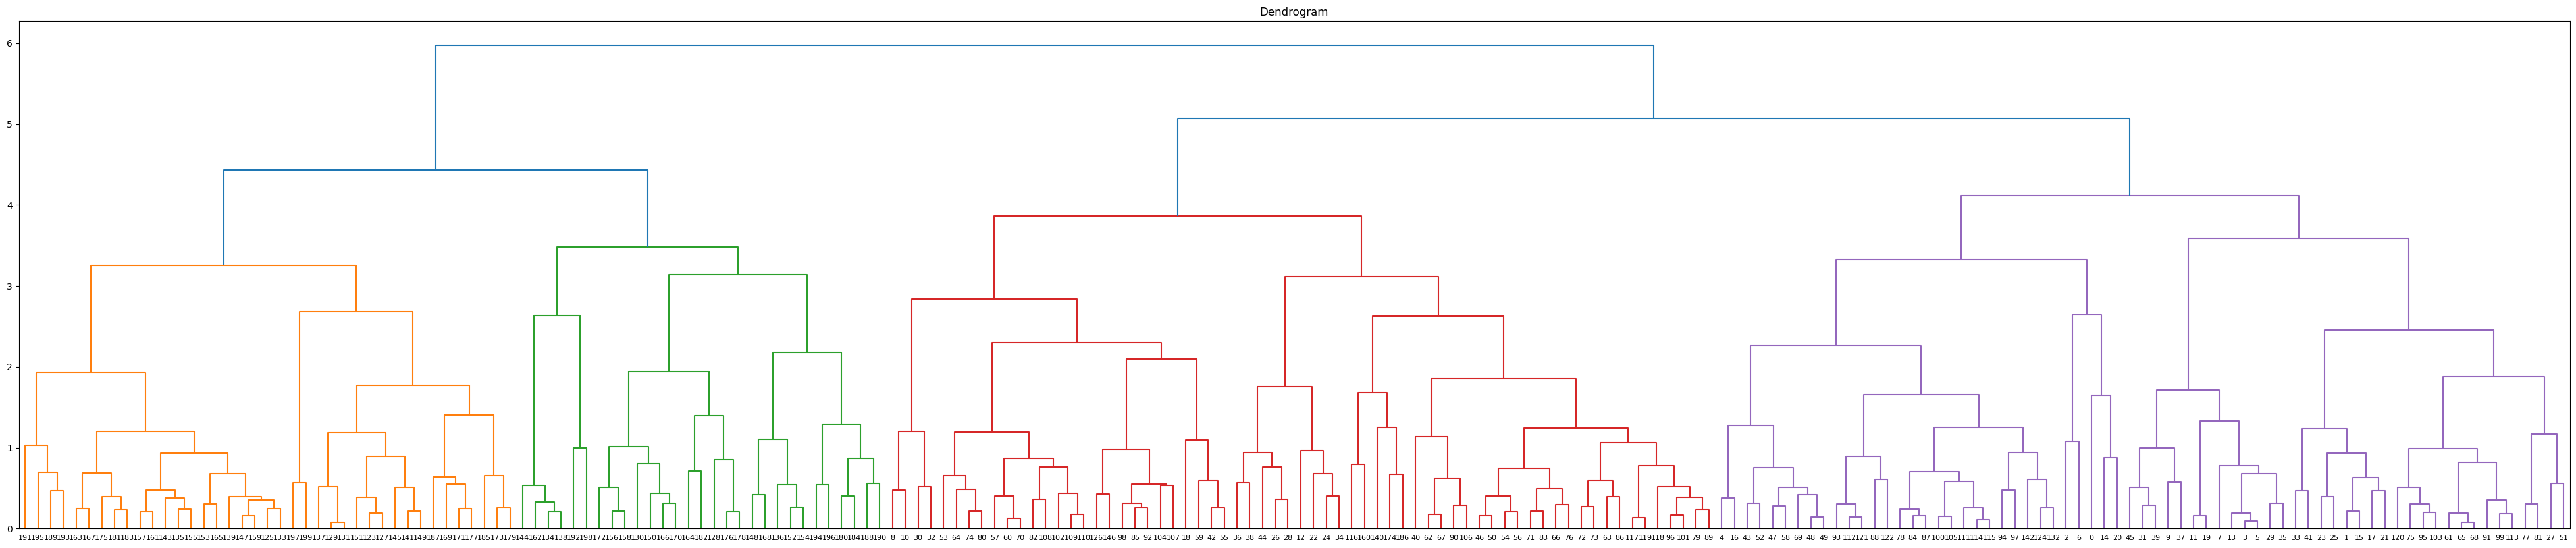

In [6]:
# dendrogram
z=linkage(norm_fun,method='complete',metric='euclidean')

# ploting graph
plt.figure(figsize=(50,10));plt.title('Dendrogram');plt.xlabel=('index');plt.ylabel=('Distance')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [8]:
# clustering
from sklearn.cluster import AgglomerativeClustering
a=AgglomerativeClustering(n_clusters=4,linkage='complete',metric='euclidean').fit(norm_fun)
a.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [9]:
# changing array to column
labels=pd.Series(a.labels_)
labels

0      0
1      0
2      0
3      0
4      0
      ..
195    3
196    1
197    3
198    1
199    3
Length: 200, dtype: int64

In [10]:
# adding new column to dataset
df['cluster']=labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,137,18,1


In [11]:
# grouping data based on cluster
df.groupby(df.cluster).mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,,
0,59.686567,0.373134,26.776119,42.537313,56.522388
1,166.103448,0.620690,39.620690,89.551724,15.758621
2,76.400000,0.415385,54.646154,50.615385,39.892308
3,162.000000,0.461538,32.692308,86.538462,82.128205
